In [1]:
%config InlineBackend.figure_format='retina'
#warnings.filterwarnings(action="ignore")
import yfinance as yf
import numpy as np
import pandas as pd

from utils.utilities import *
from utils.visualize import *
from utils.salib import *

# Data

In [6]:
# Load financial data into a pandas DataFrame
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
data.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400551,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200


# Calculations

## Entropy

In [3]:
# Shannon Entropy
INDICATOR = 'Shannon Entropy'
indicator = sh_en(data.Close, period=100)

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=True, inline=True,
                      fig_width = 1100, fig_height = 300)

Period = 100
Data length = 252



Period = 100
Data length = 500



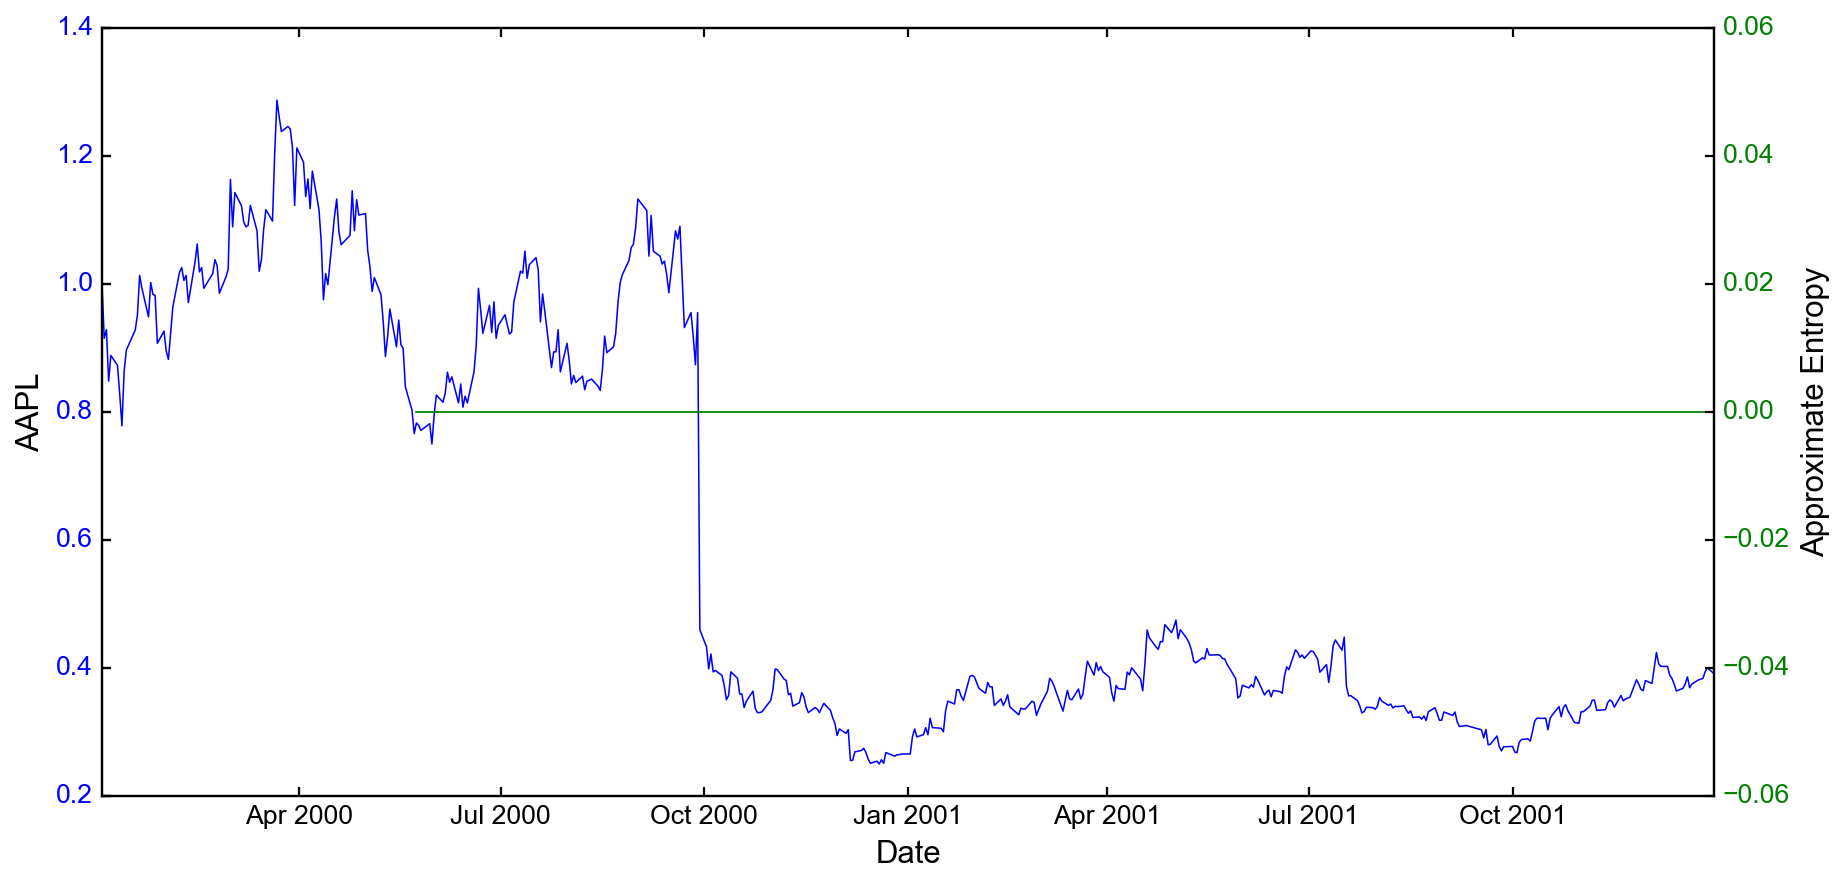

In [4]:
# Approximate Entropy
INDICATOR = 'Approximate Entropy'
indicator = ap_en(data.Close, period=100)

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=False, inline=True,
                      fig_width = 1100, fig_height = 300)

## Chaos

In [5]:
# Lyapunov Exponent
INDICATOR = 'Lyapunov Exponent'
indicator = lyapunov(data.Close, period=48)

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=True, inline=True,
                      fig_width = 1100, fig_height = 300)

Period = 48
Data length = 500



## Information

In [5]:
# Mutual Information - Constant Delay
INDICATOR = 'MI-ConstantDelay'
indicator = minfo(data.Close, period=48, delay=7, max_delay=None, method='constant delay')

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=True, inline=True,
                      fig_width = 1100, fig_height = 300)

Period = 48
Data length = 252



In [6]:
# Mutual Information - First Minimum
INDICATOR = 'MI-FirstMinimum'
indicator = minfo(data.Close, period=48, delay=None, max_delay=20, method='first minimum')

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=True, inline=True,
                      fig_width = 1100, fig_height = 300)

Period = 48
Data length = 252



## Complexity

In [7]:
# Lempel-Ziv Complexity
INDICATOR = 'Lempel-Ziv Complexity'
indicator = complex(data.Close, period=100)

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=True, inline=True,
                      fig_width = 1100, fig_height = 300)

Period = 100
Data length = 252



## Fractal

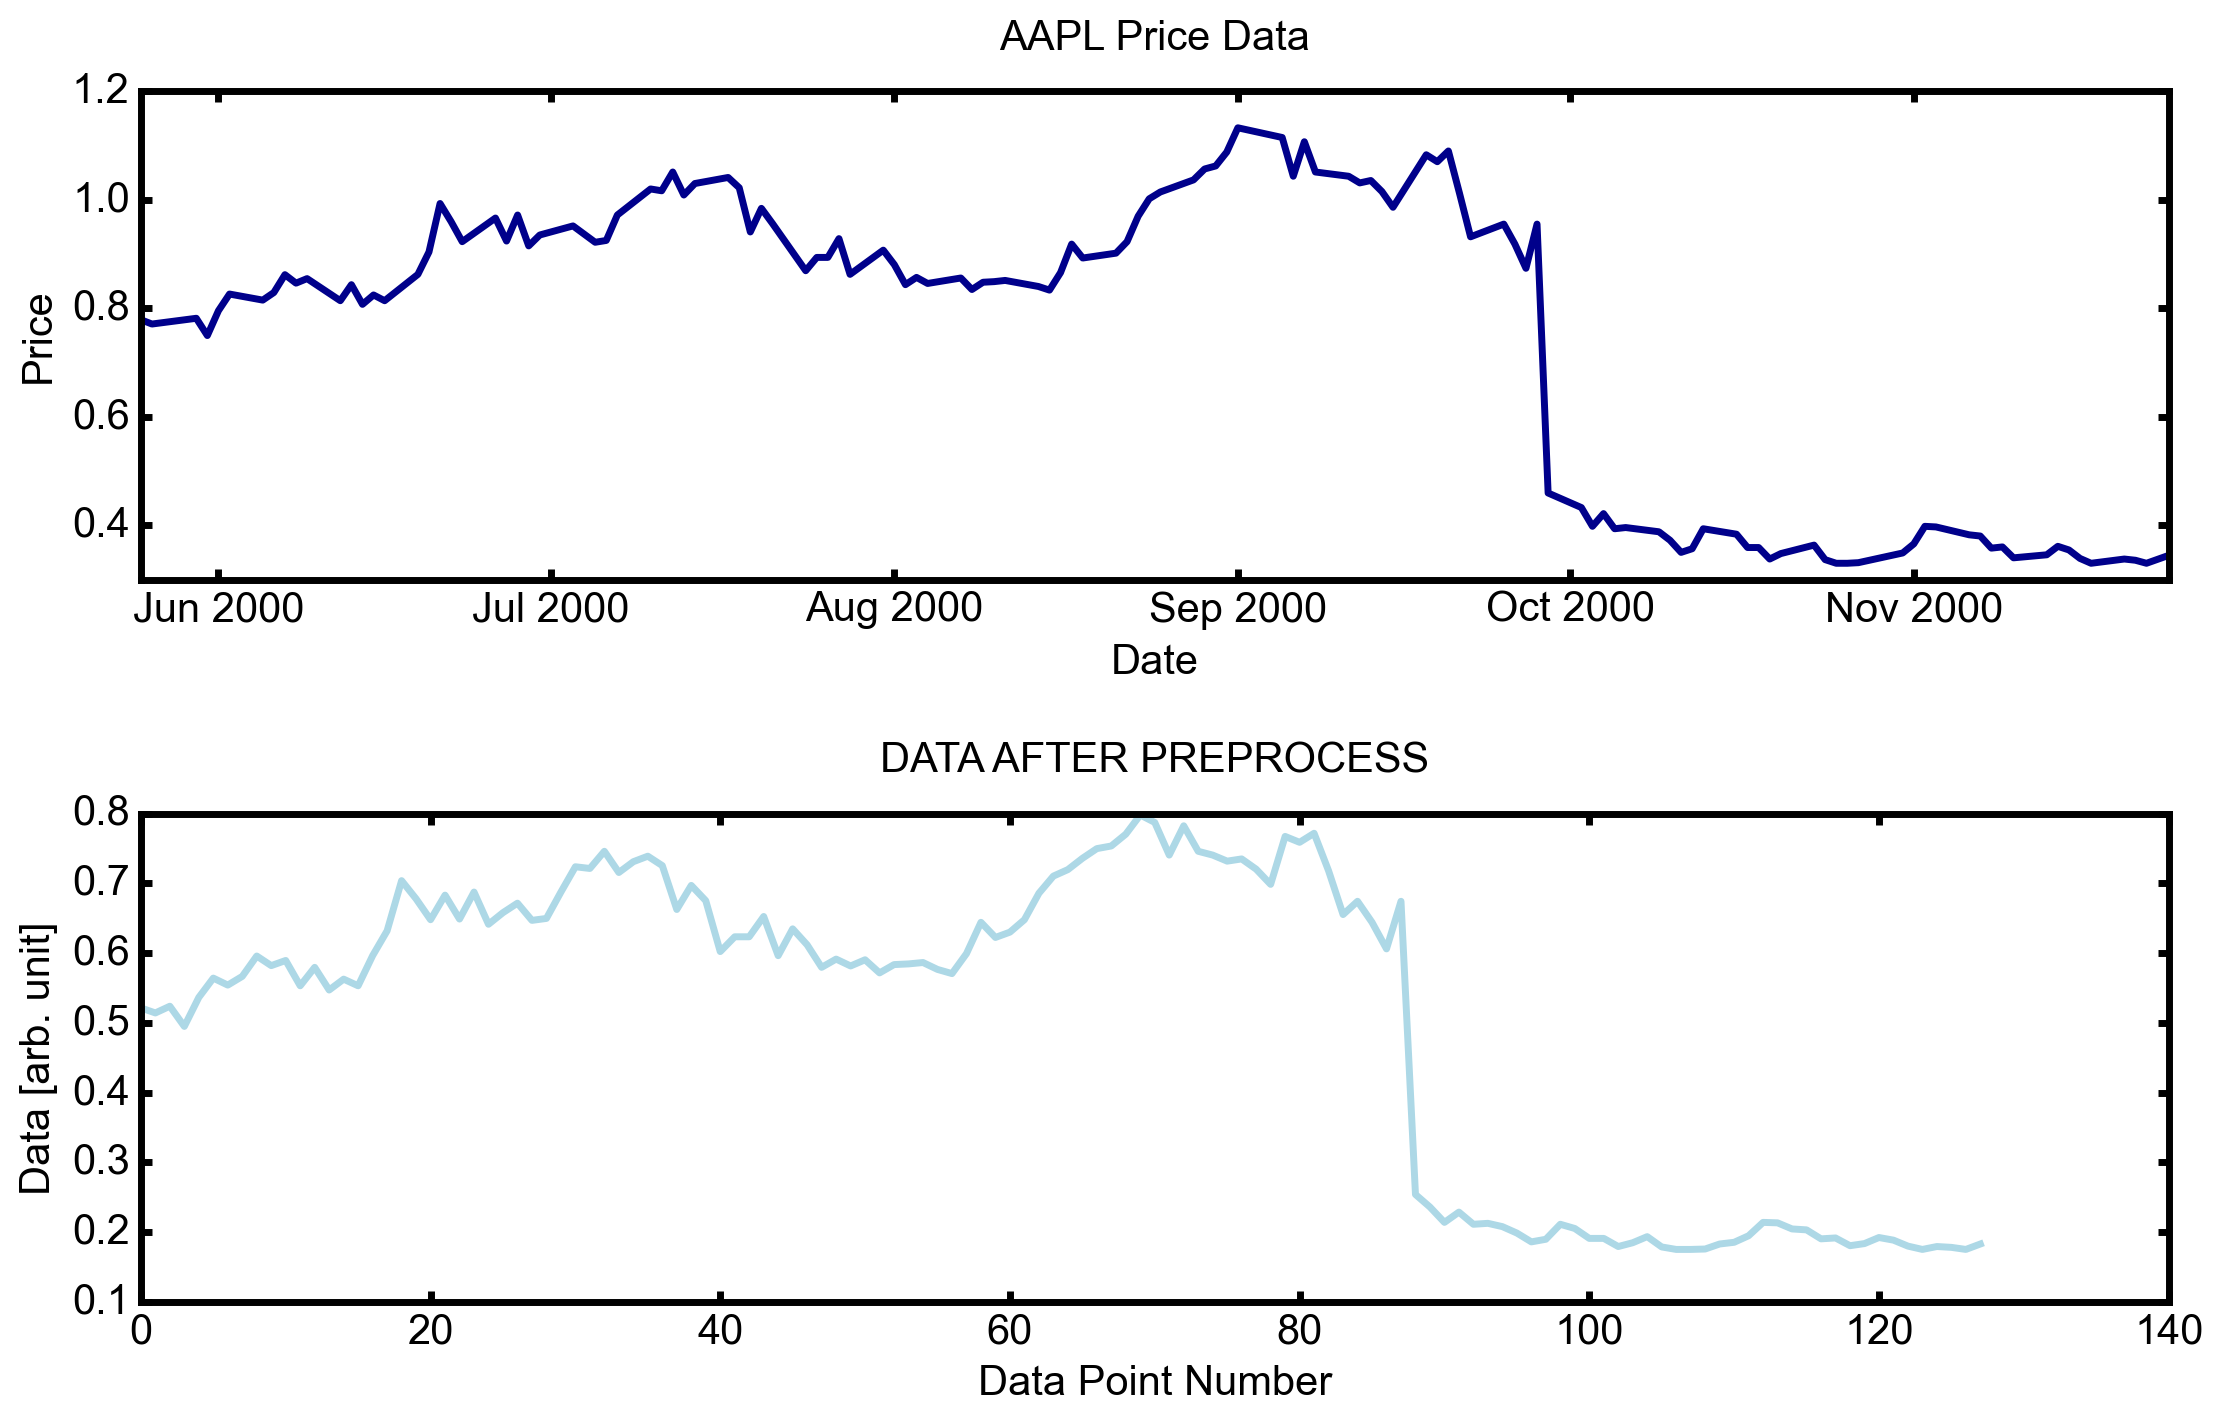

In [3]:
# Data Overview

length = 2 ** 7 # Choose a power of 2
skip = 100
series = data.Close[skip:length + skip]

overview(ticker, series, length)

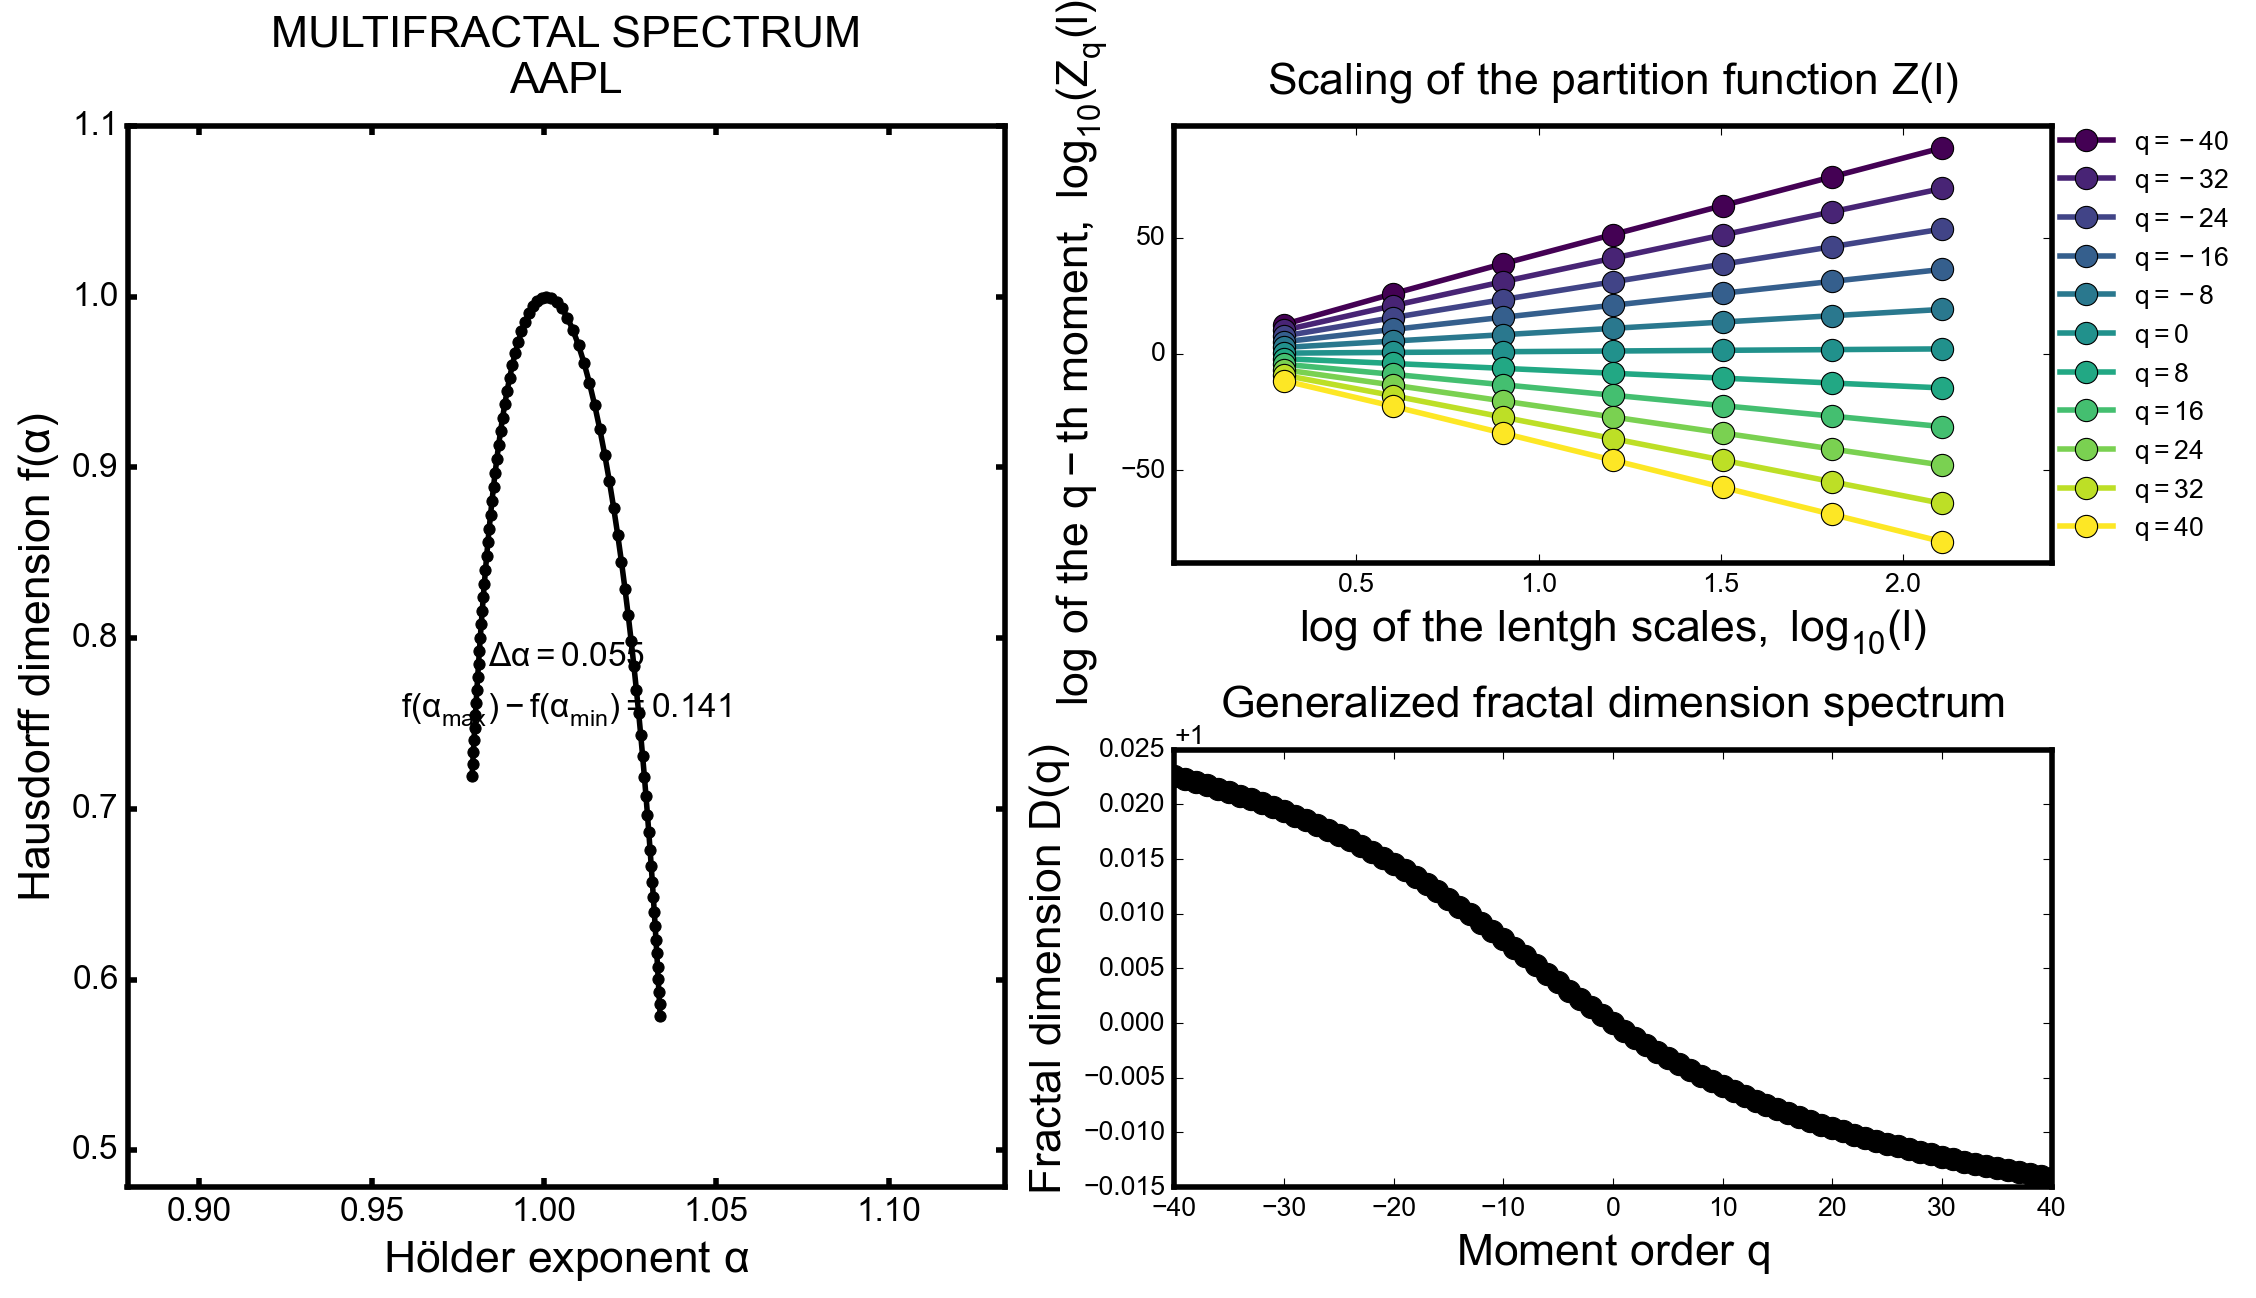

In [4]:
# Multifractal Analysis
l = int(np.floor(np.log2(len(series))))
L = 2 ** l
q_range = (-40, 40)
scale_range = (1, l)

mfa(ticker, data.Close, L, q_range, scale_range)

In [5]:
# Indicator-1: Multifractal Spectrum Width
INDICATOR = 'Multifractal Spectrum Width'
length = 2 ** 7
q_range = (-40, 40)

indicator = mfs_width(data.Close, length, q_range)

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=True, inline=True,
                      fig_width = 1100, fig_height = 300)

Period = 128
Data length = 252



In [7]:
# Indicator-2: Multifractal Spectrum Height
INDICATOR = 'Multifractal Spectrum Height'
length = 2 ** 7
q_range = (-40, 40)

indicator = mfs_height(data.Close, length, q_range)

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=True, inline=True,
                      fig_width = 1100, fig_height = 300)

Period = 128
Data length = 252



## Recurrence

In [8]:
# Recurrence Quantification Analysis

In [5]:
# Indicator-1: Recurrence Rate
INDICATOR = 'Recurrence Rate'
indicator = rec_rate(data.Close, period=100)

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=True, inline=True,
                      fig_width = 1100, fig_height = 300)

Period = 100
Data length = 252



In [6]:
# Indicator-2: Determinism
INDICATOR = 'Determinism'
indicator = rec_rate(data.Close, period=100)

plot = indicator_plot(ticker,
                      price_data_series=data.Close,
                      price_data_frame=data,
                      indicator_data=indicator,
                      indicator_name=INDICATOR,
                      interactive=True, inline=True,
                      fig_width = 1100, fig_height = 300)

Period = 100
Data length = 252



In [ ]:
# Indicator-3: Laminarity


### Recurrence Plot

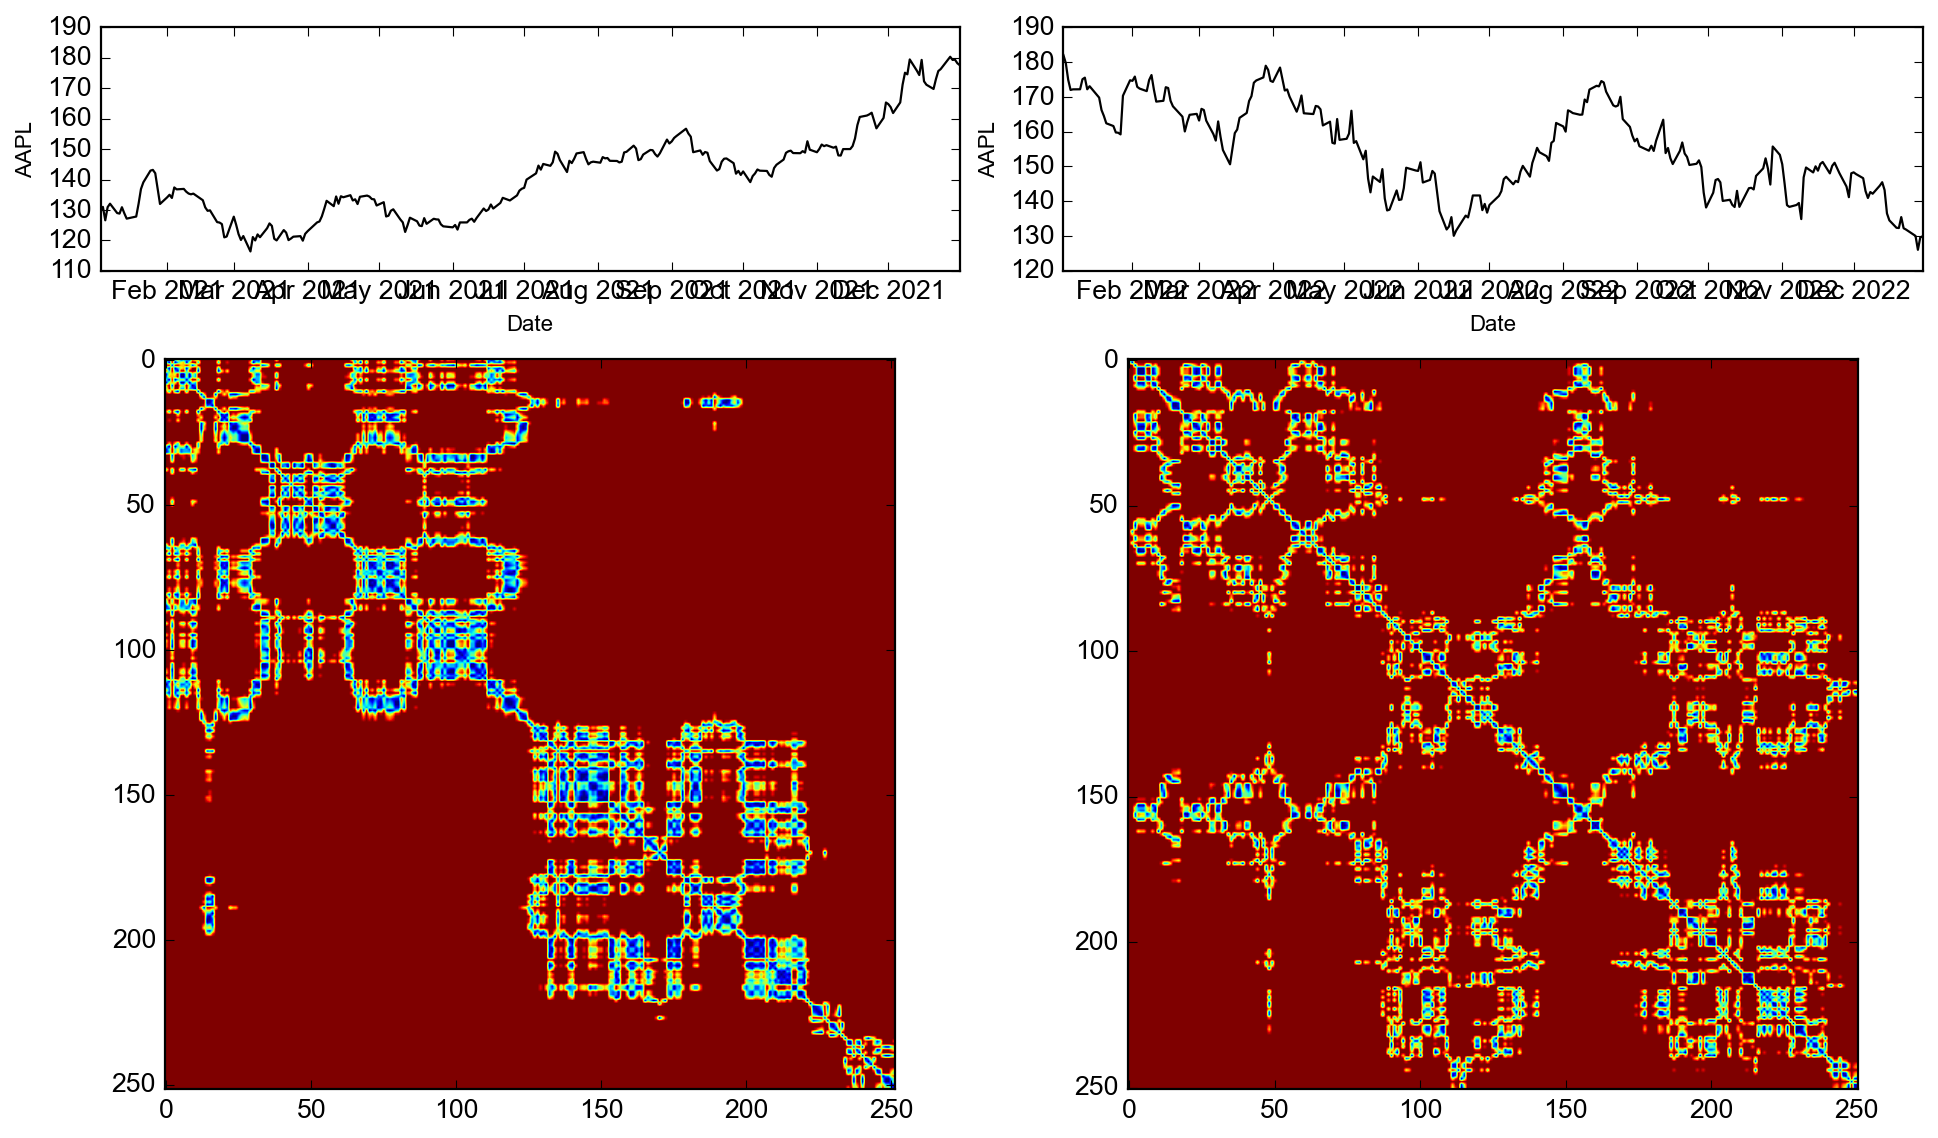

In [7]:
#import pylab

eps = 0.3
steps = 10

# calculate two different data section
x = data.Close["2021-01-01":"2022-01-01"]
recurrence_x = recurrence_plot(x.values, eps=eps, steps=steps)

y = data.Close["2022-01-01":"2023-01-01"]
recurrence_y = recurrence_plot(y.values, eps=eps, steps=steps)

    # plot unifrom dist filtered with moving average
    #x: ru = np.random.uniform(low=-1, high=1, size=N)
    #ru_filtered = moving_average(ru)

    # plot normal dist filtered with moving average
    #y: rn = np.random.normal(size=N)
    #rn_filtered = moving_average(rn)

#================================= PLOT DATA =================================#
fig = plt.figure(constrained_layout=True, figsize=(12, 7))  
plt.style.use('classic')
fig.set_facecolor('white')
plt.rcParams['font.family'] = 'Arial'

gs = fig.add_gridspec(4, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x, linestyle='-', color="k")
ax1.set_xlabel("Date", fontsize=10)
ax1.set_ylabel(ticker, fontsize=10)

ax2 = fig.add_subplot(gs[1:,0])
ax2.imshow(recurrence_x)

ax3 = fig.add_subplot(gs[0, 1])
ax3.plot(y, linestyle='-', color="k")
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel(ticker, fontsize=10)

ax4 = fig.add_subplot(gs[1:,1])
ax4.imshow(recurrence_y)
plt.show()